In [ ]:
# commands
y-->continous-->regression
y-->discrete-->classification
y-->catagorical-->discrete-->classification

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df=pd.read_csv(r"C:\Users\Home\Favorites\Downloads\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [4]:
df.shape

(2000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [8]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [10]:
x=df.drop("Age",axis=1)
y=df["Age"]

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

In [44]:
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

In [46]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [47]:
y_pred = model.predict(X_test)

In [48]:
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 76.81%
Testing Accuracy: 79.00%


In [54]:
# Compute correlation matrix
corr_matrix = df.corr()
corr_matrix


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


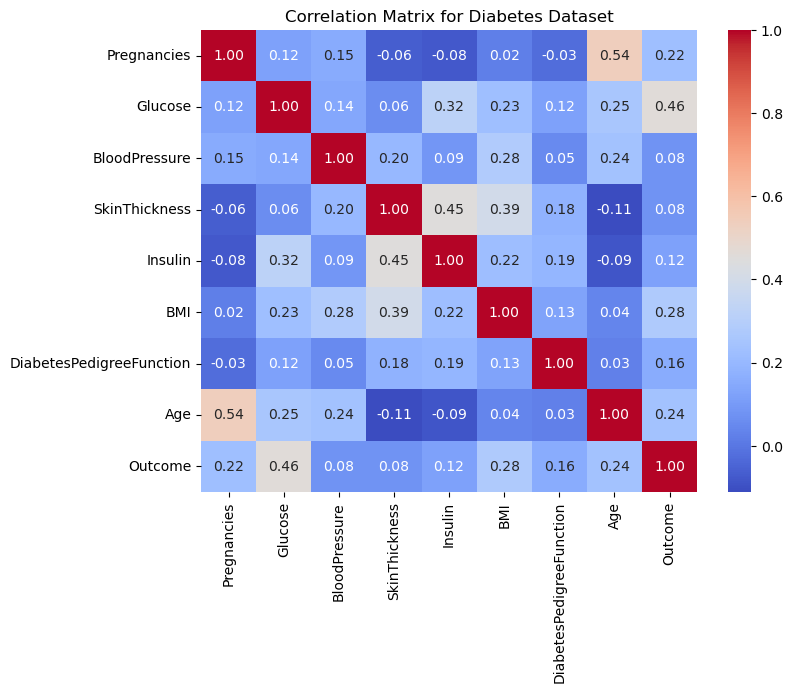

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Matrix for Diabetes Dataset")
plt.show()

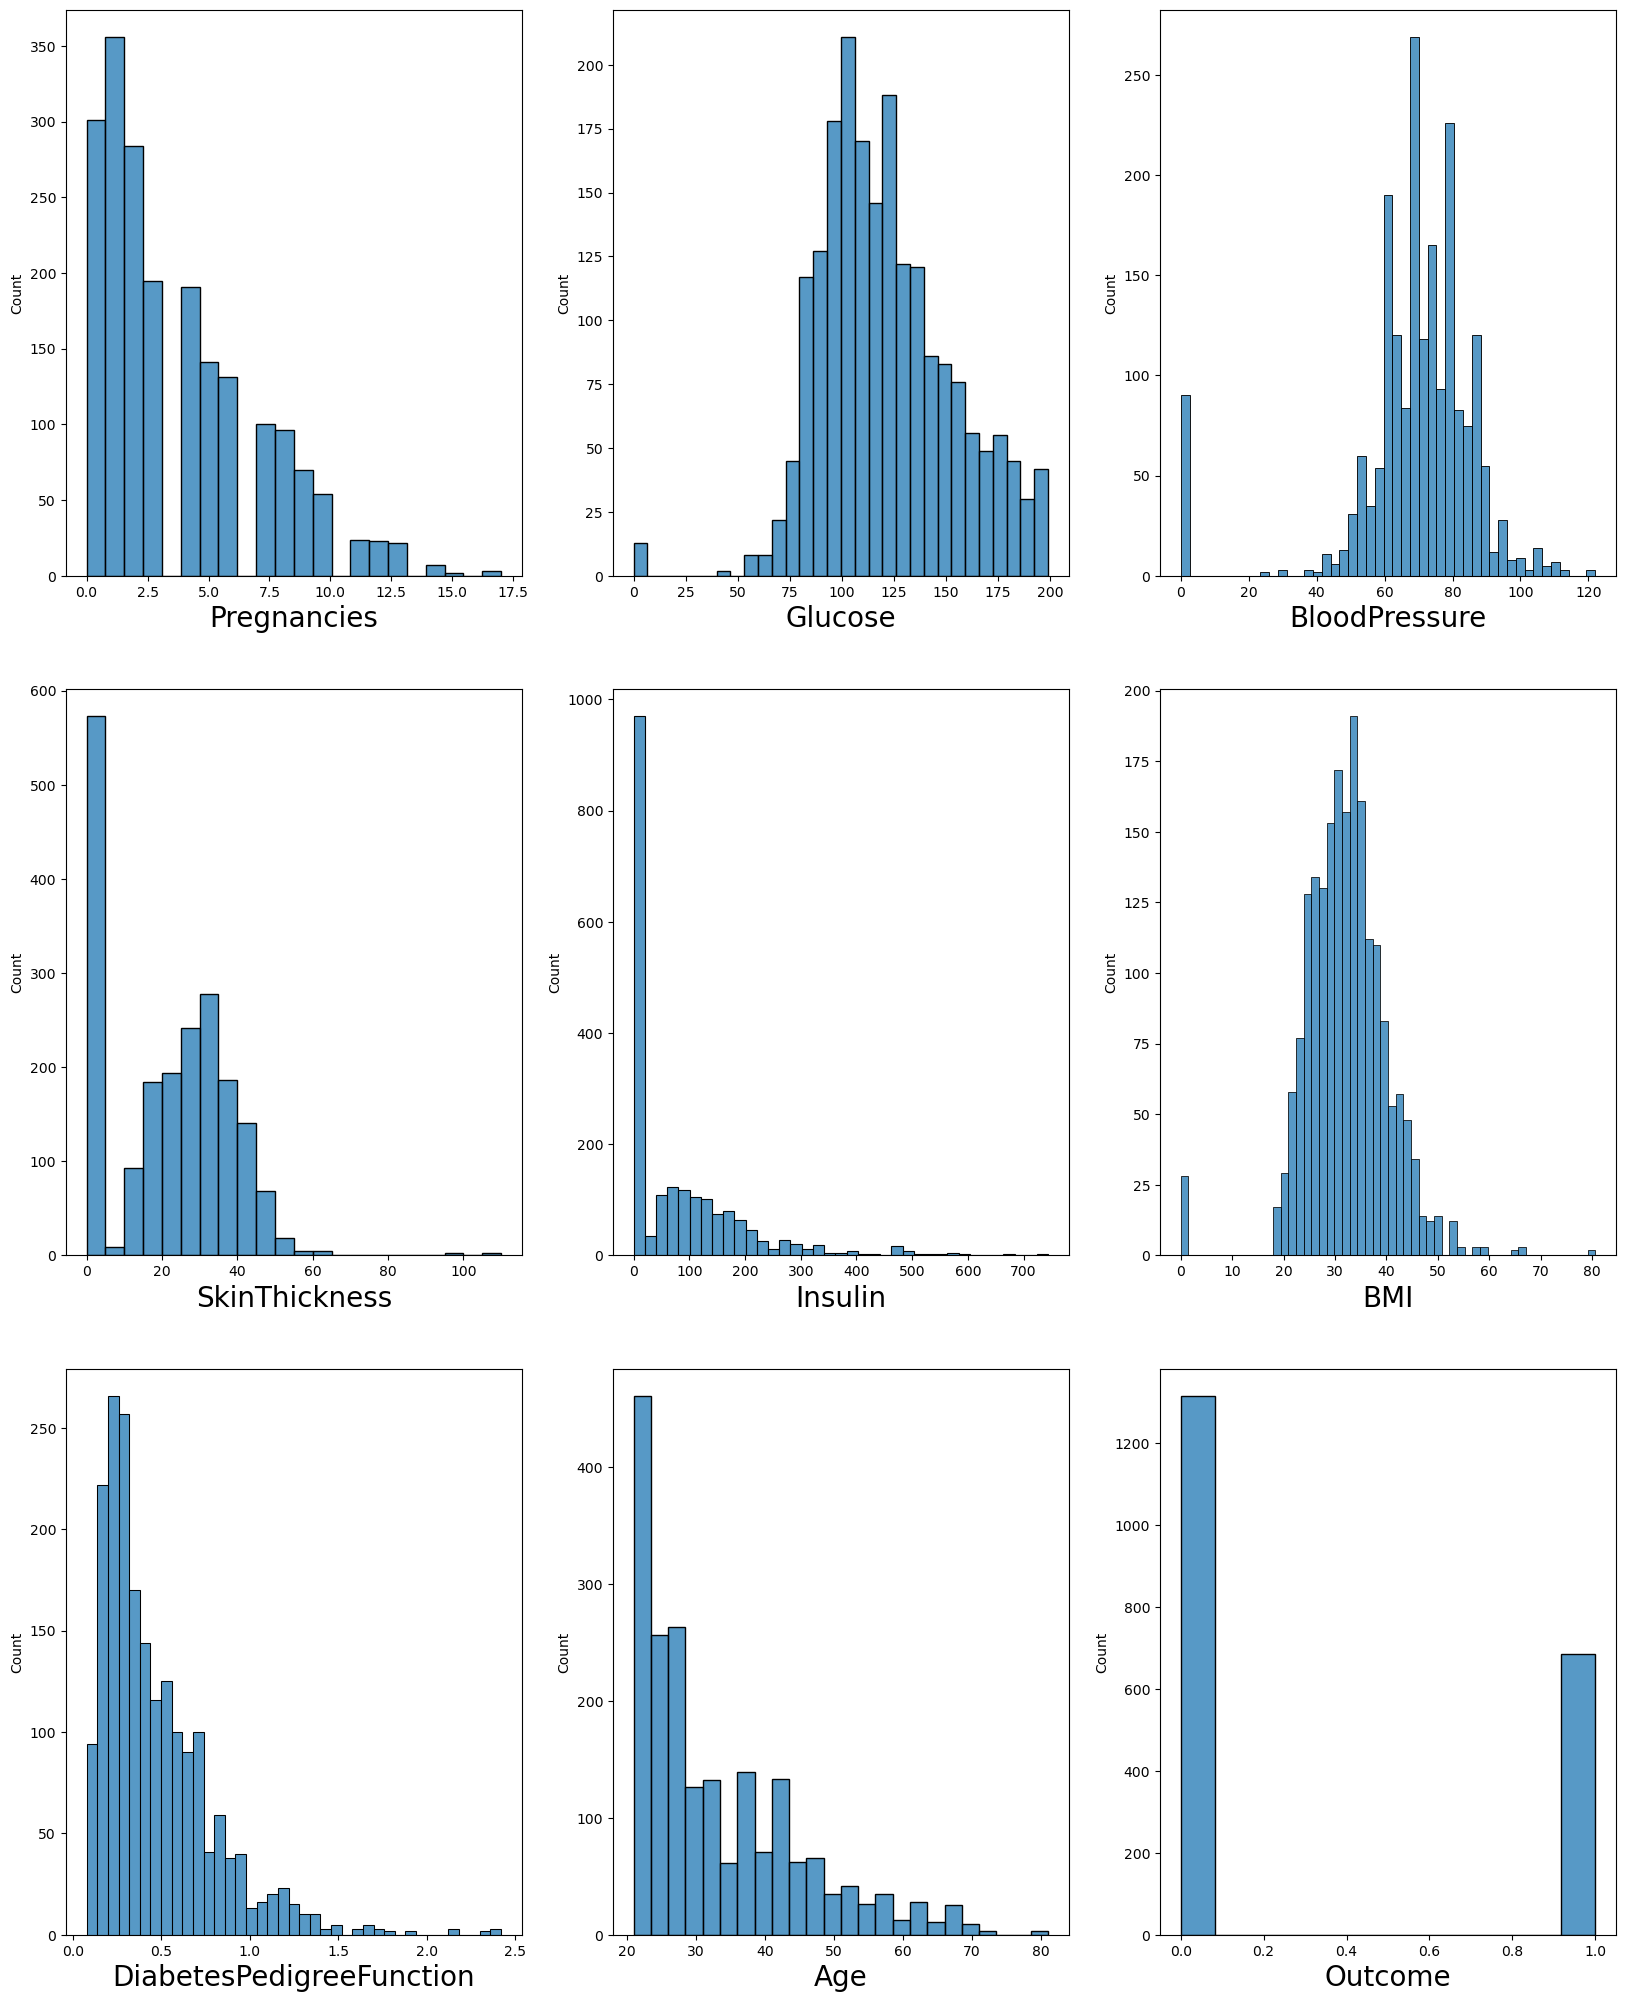

In [62]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [66]:
df['BMI']=df['BMI'].replace(0,df['BMI'].median())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())

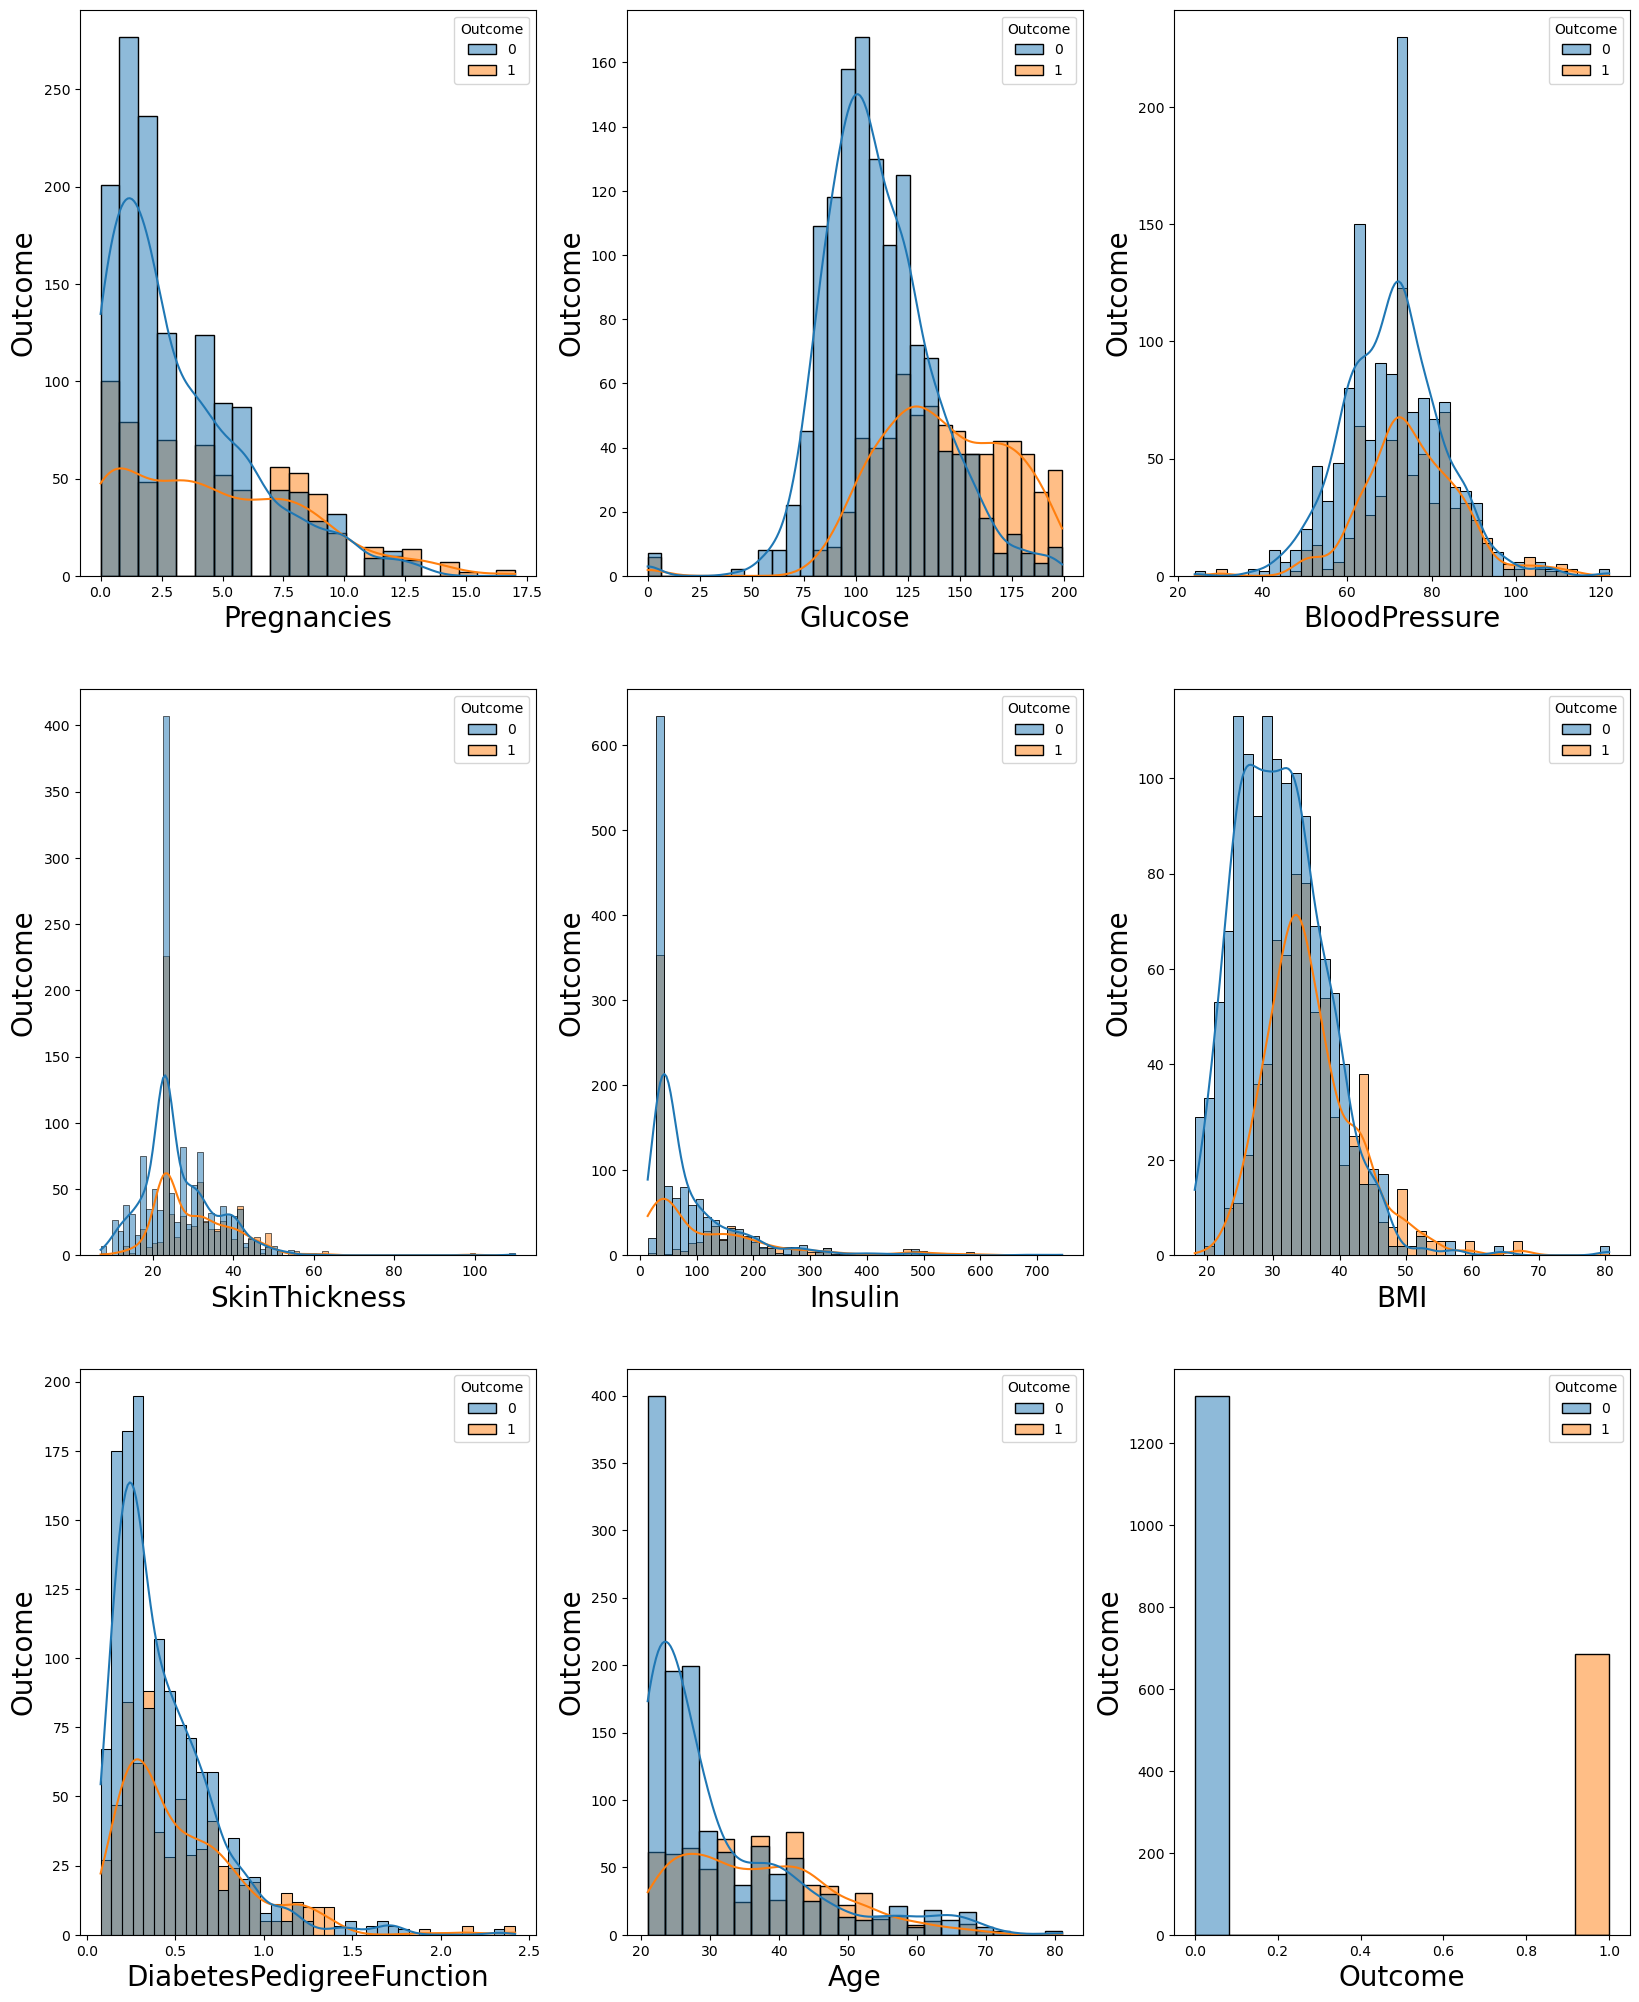

In [68]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(x=df[column],hue=df['Outcome'],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Outcome',fontsize=20) 
    plotnumber+=1
plt.show()

In [ ]:
# Analysis – Insights
Most features such as Glucose, BloodPressure, BMI, and Age show non-uniform distributions, indicating variability among patients.
Glucose and BMI distributions are slightly right-skewed, suggesting that a subset of patients has higher values, which may increase diabetes risk.
Some attributes contain zero or very low values, which may represent missing or abnormal medical readings.
The variation in feature ranges justifies the use of feature scaling before model training.
#Correlation Matrix – Insights
Glucose shows the highest positive correlation with the target variable (Outcome), indicating it is a strong predictor of diabetes.
BMI and Age also show moderate positive correlation with the Outcome.
Several features show low inter-correlation, suggesting minimal redundancy and usefulness for model training.
No pair of features shows extremely high correlation, reducing the risk of multicollinearity.
#Training vs Testing Accuracy – Insights (Generalization)
The training accuracy and testing accuracy are very close to each other.
This small difference indicates that the model does not memorize the training data.
The model performs consistently on both seen and unseen data.
#Overall EDA Insights (One-Slide Summary )
The dataset contains meaningful patterns relevant to diabetes prediction.
Key features such as Glucose, BMI, and Age significantly influence the target outcome.
Feature scaling is essential due to varied data distributions.
3The dataset is suitable for machine learning classification models.
#BMI
Higher BMI values are more frequent in patients with Outcome = 1, indicating overweight may be linked to diabetes.
#BloodPressure
Most patients, regardless of outcome, have blood pressure around 70–80 mmHg, but slightly higher values appear in Outcome = 1.
#Insulin
Insulin levels are widely spread; patients with Outcome = 1 tend to have higher insulin levels, suggesting insulin resistance.
#SkinThickness
SkinThickness is slightly higher in diabetic patients, but distributions overlap, so it’s less distinctive.
#Pregnancies
Diabetic patients (Outcome = 1) often have more pregnancies, but there’s overlap with non-diabetic patients.
#Glucose
High glucose levels strongly associate with Outcome = 1; low glucose mostly appears in Outcome = 0.
#Age
Older patients tend to have higher diabetes risk; distribution shows Outcome = 1 more concentrated in higher age range.
#DiabetesPedigreeFunction (DPF)
Higher DPF values (genetic risk) are more frequent in diabetic patients.


In [92]:
from scipy import stats
import statsmodels.api as sm
Glucose_pos=df[df['Outcome']==1]['Glucose']
Glucose_negative=df[df['Outcome']==0]['Glucose']

In [102]:
t_stat,p_val=stats.ttest_ind(Glucose_pos,Glucose_pos)
print("Independent T-Test Statistics:",t_stat)
print("p-values:",p_val)

if p_val<0.05:
    print("Reject null hypothesis:")
else:
    print("Fail to reject null hypothesis:")

Independent T-Test Statistics: 0.0
p-values: 1.0
Fail to reject null hypothesis:


#T-Test
**Definition:**t-test is used to compare means when the population variance is unknown or sample size is small.

-----

##Independent T-Test
**example:** compare ** Glucouse** of **positive vs negative** person

**hypotheses:**
-H0:Glucode distribution of positive =Glcouse distribution of negative
-H1:Glucose distribution of positive != Glucose distribution of negative


In [100]:
t_stat,p_val=stats.ttest_ind(Glucose_pos,Glucose_negative)
print("Independent T-Test Statistics:",t_stat)
print("p-values:",p_val)

if p_val<0.05:
    print("Reject null hypothesis:")
else:
    print("accept null hypothesis:")

Independent T-Test Statistics: 23.05633354719803
p-values: 1.724006801539328e-104
Reject null hypothesis:


In [96]:
t_stat, p_value = stats.ttest_ind(
    Pregnancies_pos,
    Pregnancies_neg,
    equal_var= True
)

print("P-value:", p_value)

P-value: 2.968017579508808e-24


In [ ]:
from scipy import stats

# Remove zero blood pressure values
df_clean = df[df['BloodPressure'] != 0]

BloodPressure_pos = df_clean[df_clean['Outcome'] == 1]['BloodPressure']
BloodPressure_neg = df_clean[df_clean['Outcome'] == 0]['BloodPressure']

In [97]:
t_stat, p_value = stats.ttest_ind(
    BloodPressure_pos,
    BloodPressure_neg,
    equal_var= True
)

print("P-value:", p_value)

P-value: 4.332434442926917e-15


In [ ]:

from scipy import stats

# Remove zero blood pressure values
df_clean = df[df['Insulin'] != 0]

Insulin_pos = df_clean[df_clean['Outcome'] == 1]['Insulin']
Insulin_neg = df_clean[df_clean['Outcome'] == 0]['Insulin']

In [99]:
t_stat, p_value = stats.ttest_ind(
    Insulin_pos,
    _neg,
    equal_var= True
)

print("P-value:", p_value)

P-value: 6.914620562627028e-11


In [93]:
from scipy import stats

# Remove zero blood pressure values
df_clean = df[df['SkinThickness'] != 0]

SkinThickness_pos = df_clean[df_clean['Outcome'] == 1]['SkinThickness']
SkinThickness_neg = df_clean[df_clean['Outcome'] == 0]['SkinThickness']

In [94]:
t_stat, p_value = stats.ttest_ind(
    SkinThickness_pos,
    SkinThickness_neg,
    equal_var= True
)

print("P-value:", p_value)

P-value: 2.9903729132502143e-16


In [ ]:
#Glucose is > than 0.5 effective
#Pregnancies is > than 0.5 effective
#BloodPressure > than 0.5 effective
#SkinThckness > than 0.5 effective
#Insulin > than 0.5 effective

In [103]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled


array([[-0.5153943 ,  0.52455322, -0.86930967, ...,  0.13282408,
        -1.06324616,  1.18042417],
       [-1.12049474, -1.1597562 ,  0.80477375, ...,  0.77273898,
        -0.7355513 , -0.85632626],
       [-1.12049474,  0.74288962, -0.03226796, ...,  1.60741059,
         0.49175869, -0.17740945],
       ...,
       [ 0.69480658, -1.12856529,  0.46995707, ..., -0.20104457,
        -0.27492362,  0.75610116],
       [-1.12049474,  0.24383498,  3.14849054, ...,  4.79307391,
        -0.46968566, -0.60173245],
       [-0.5153943 , -1.25332895, -0.03226796, ..., -0.3540677 ,
         0.23516743, -0.68659705]], shape=(2000, 8))

In [ ]:
#scaling:
standardization=xi-xmean/sigma
normalization=xi-xmean/xmax-xmin

In [110]:
df['Glucose'].mean()

np.float64(121.1825)

In [111]:
df['Glucose'].std()

32.0686356499029

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,-1.065814e-17,-1.563194e-16,5.613288e-16,3.375078e-17,3.375078e-17,-3.836931e-16,1.225686e-16,1.136868e-16
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.120495e+00,-3.779793e+00,-4.050068e+00,-2.146611e+00,-8.675018e-01,-2.009500e+00,-1.214728e+00,-1.026055e+00
25%,-8.179445e-01,-6.918925e-01,-7.019013e-01,-4.732073e-01,-6.033107e-01,-7.018475e-01,-7.015452e-01,-7.714617e-01
50%,-2.128441e-01,-1.304560e-01,-3.226796e-02,-4.732073e-01,-6.033107e-01,-4.802144e-02,-2.934724e-01,-3.471387e-01
75%,6.948066e-01,6.181260e-01,6.373654e-01,4.680825e-01,3.111967e-01,5.779823e-01,4.732099e-01,5.863720e-01
max,4.022859e+00,2.427199e+00,4.152941e+00,8.625927e+00,6.550170e+00,6.671085e+00,6.025474e+00,4.065821e+00


In [123]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()
x_scaled_norm=norm.fit_transform(x)
x_scaled_norm= pd.DataFrame(x_scaled_norm, columns=x.columns)
x_scaled_norm.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.217853,0.608957,0.493730,0.199267,0.116951,0.231494,0.167775,0.201508
std,0.194474,0.161149,0.121937,0.092852,0.134847,0.115228,0.138152,0.196440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.408163,0.155340,0.035616,0.150641,0.070880,0.050000
50%,0.176471,0.587940,0.489796,0.155340,0.035616,0.225962,0.127242,0.133333
75%,0.352941,0.708543,0.571429,0.242718,0.158904,0.298077,0.233134,0.316667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [124]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=42)

In [128]:
from sklearn.neighbors import KNeighborsClassifier

error_rate=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

In [129]:
error_rate

[np.float64(0.036),
 np.float64(0.118),
 np.float64(0.158),
 np.float64(0.188),
 np.float64(0.186),
 np.float64(0.202),
 np.float64(0.188),
 np.float64(0.216),
 np.float64(0.192),
 np.float64(0.204)]